# HANDLING MISSING VALUES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("D:/DSML/DataSet/Churn_Modelling(1).csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,NaN,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9000 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                1000
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
dtype: int64

**In Age clounmns there is some null values**

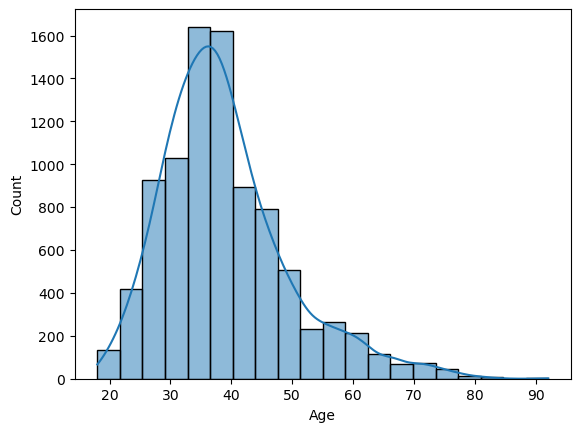

In [5]:
sns.histplot(df,x='Age',bins=20,kde=True)
plt.show()

**here right skweed curve here the best replace with median**

In [6]:
df['Age'].median()

37.0

In [7]:
df1=df
df1['Age']=df1['Age'].fillna(df['Age'].median())


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Featutre scaling

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [10]:
df.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.74,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,9.99,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,43.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


## Noramlization

In [11]:
new_df=pd.DataFrame(df,columns=['Age','Tenure'])

In [12]:
new_df.head(5)

,Age,Tenure
0,37.0,2
1,41.0,1
2,42.0,8
3,37.0,1
4,43.0,2


In [13]:
scaler=MinMaxScaler()
normalize_df=scaler.fit_transform(new_df)
print(normalize_df)

[[0.25675676 0.2       ]
 [0.31081081 0.1       ]
 [0.32432432 0.8       ]
 ...
 [0.24324324 0.7       ]
 [0.32432432 0.3       ]
 [0.13513514 0.4       ]]


In [14]:
x=np.array([[2],[3],[5],[6],[6]])
scaler=MinMaxScaler()
noraml_arr=scaler.fit_transform(x)
print(noraml_arr)

[[0.  ]
 [0.25]
 [0.75]
 [1.  ]
 [1.  ]]


## Standerdization

In [15]:
scaler=StandardScaler()
standerdize=scaler.fit_transform(new_df)
print(standerdize)

[[-0.17380629 -1.04175968]
 [ 0.22648457 -1.38753759]
 [ 0.32655729  1.03290776]
 ...
 [-0.27387901  0.68712986]
 [ 0.32655729 -0.69598177]
 [-1.07446074 -0.35020386]]


In [16]:
x=np.array([[2],[3],[5],[6],[6]])
scaler=StandardScaler()
noraml_arr=scaler.fit_transform(x)
print(noraml_arr)

[[-1.47709789]
 [-0.86164044]
 [ 0.36927447]
 [ 0.98473193]
 [ 0.98473193]]


# Outlier Treatment

In [17]:
import statistics

In [18]:
data=pd.read_csv("D:/DSML/DataSet/raw_sales.csv")

In [19]:
data.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [20]:
data.shape

(29580, 5)

In [21]:
def find_anomalies(data):
    anomalies=[]
    data_std=statistics.stdev(data)
    data_mean=statistics.mean(data)

    anomaly_cut_of=data_std*3

    lower_limt=data_mean-anomaly_cut_of
    upper_limit=data_mean+anomaly_cut_of

    for outlier in data:
        if outlier>upper_limit or outlier<lower_limt:
            anomalies.append(outlier)
    return anomalies
    

In [22]:
 data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [23]:
list_1=find_anomalies(data['price'])
len(list_1)

461

In [24]:
data.price.skew()

np.float64(4.312009366902367)

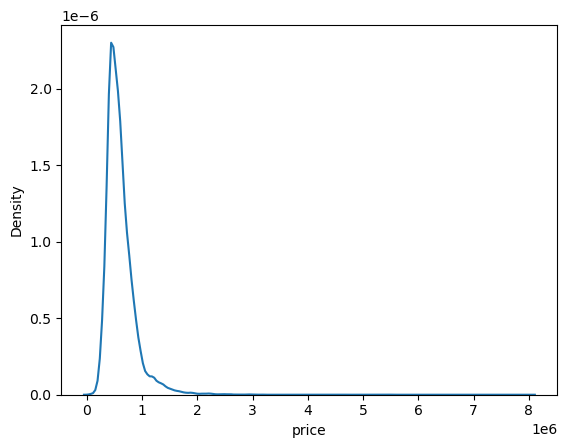

In [25]:
sns.kdeplot(data.price)
plt.show()

In [26]:
data['price_transformed']=np.log(data.price)

In [27]:
data.price.skew()

np.float64(4.312009366902367)

In [28]:
list_2=find_anomalies(data.price_transformed)
len(list_2)

266

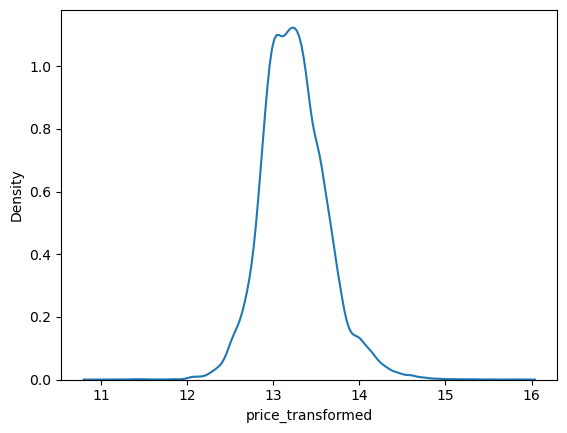

In [29]:
sns.kdeplot(data.price_transformed)
plt.show()

## BOXPLOT

<Axes: >

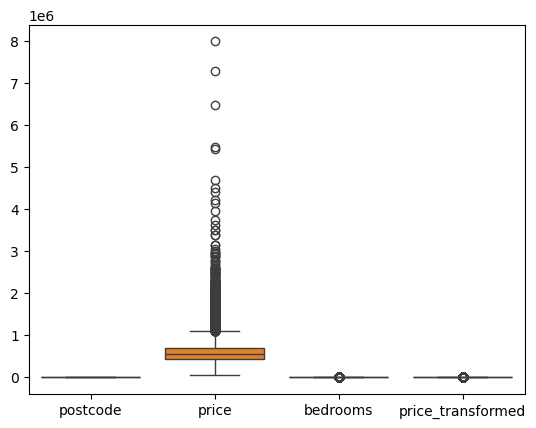

In [30]:
sns.boxplot(data=data)

In [31]:
df=pd.DataFrame(data)

In [32]:
df.describe()

,postcode,price,bedrooms,price_transformed
count,29580.000000,2.958000e+04,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695
std,146.717292,2.817079e+05,0.951275,0.375214
min,2600.000000,5.650000e+04,0.000000,10.941996
25%,2607.000000,4.400000e+05,3.000000,12.994530
50%,2615.000000,5.500000e+05,3.000000,13.217674
75%,2905.000000,7.050000e+05,4.000000,13.465953
max,2914.000000,8.000000e+06,5.000000,15.894952


In [33]:
df=pd.read_csv("D:/DSML/DataSet/Churn_Modelling(1).csv")

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,NaN,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


# Univarite Analize

In [35]:
df1=df[['Gender','Geography','Exited']]

In [36]:
df1.head(5)

,Gender,Geography,Exited
0,Female,France,1
1,Female,Spain,0
2,Female,France,1
3,Female,France,0
4,Female,Spain,0


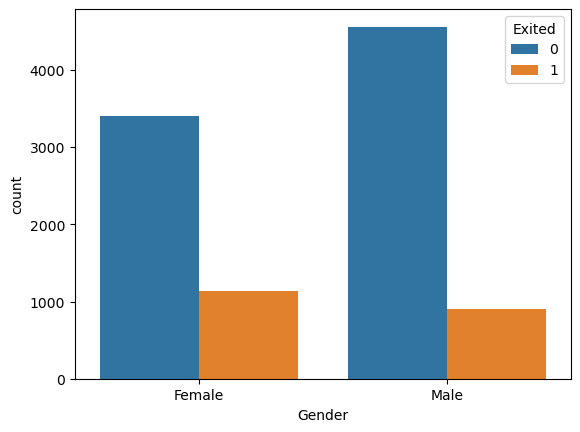

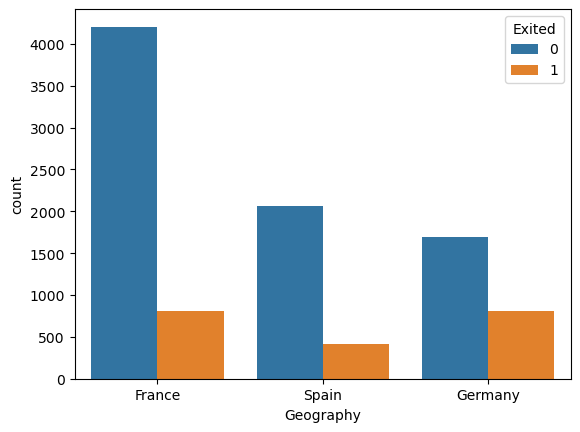

In [38]:
for i,pre in enumerate(df1.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=df1,x=pre,hue='Exited')
plt.show()    

# Bivariate Analysis

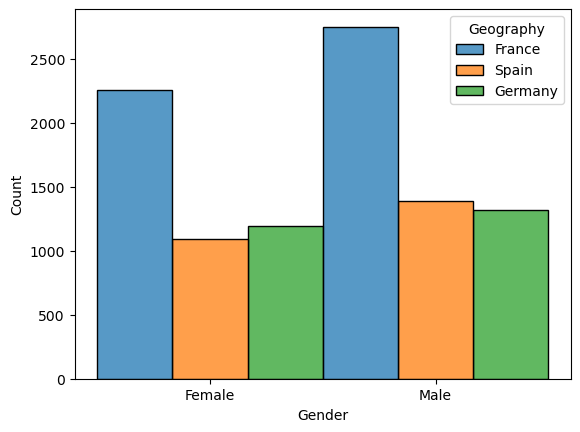

In [40]:
sns.histplot(x='Gender',hue='Geography',data=df1,stat='count',multiple='dodge')
plt.show()

# Numeric Analysis

In [45]:
df2=df.corr(numeric_only=True)

<Axes: >

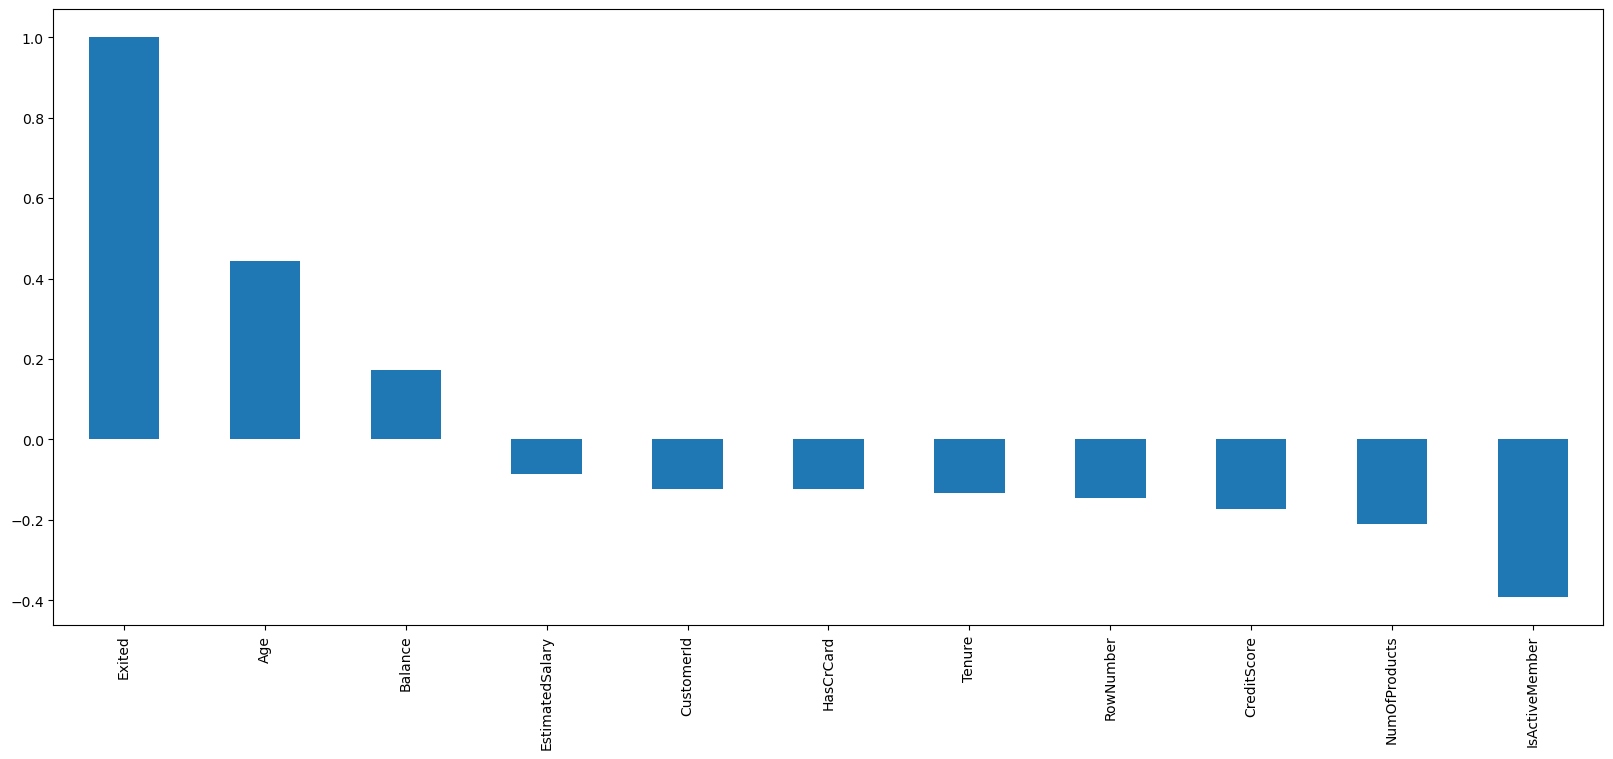

In [46]:
plt.figure(figsize=(20,8))
df2.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

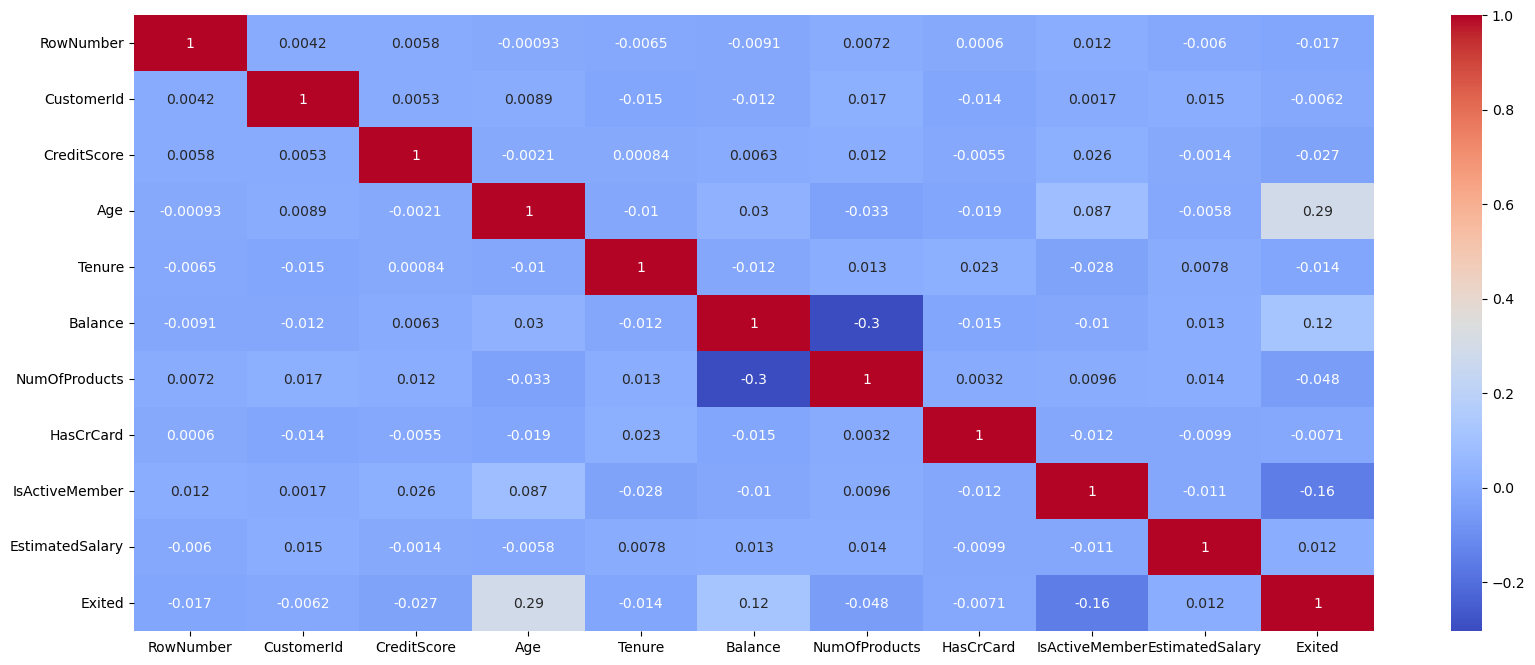

In [51]:
plt.figure(figsize=(20,8))
sns.heatmap(df2,cmap='coolwarm',annot=True)
plt.show()

# Feature binning

In [52]:
from sklearn import preprocessing

In [55]:
df.head(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,NaN,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9000 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [57]:
df.drop(columns=['CustomerId','RowNumber','Surname'],axis=1,inplace=True)

In [58]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,NaN,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [59]:
df.Age.min()

18.0

In [60]:
df.Age.max()

92.0

In [65]:
labels=['0-20','21-40','40-60','Above 61']
bins=[0,20,40,60,100]
df['age_bin']=pd.cut(df.Age,bins,labels=labels,include_lowest=True)

In [66]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_bin
0,619,France,Female,NaN,2,0.00,1,1,1,101348.88,1,NaN
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,40-60
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,40-60
3,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0,NaN
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,40-60


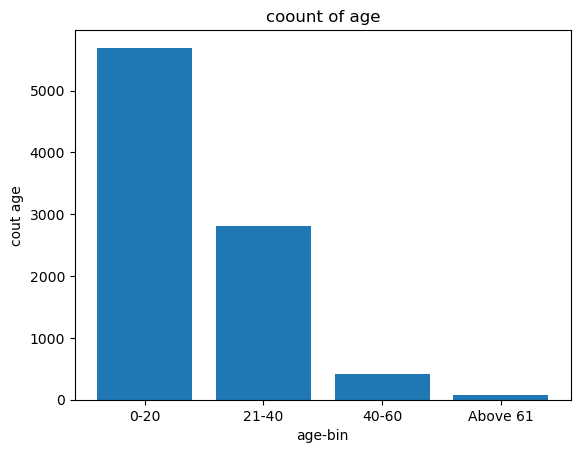

In [69]:
plt.bar(labels,df.age_bin.value_counts())
plt.title('coount of age')
plt.xlabel('age-bin')
plt.ylabel('cout age')
plt.show()

# Feature encoding

In [70]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

### Label Encoding

In [72]:
le= preprocessing.LabelEncoder()
df['Gender']=le.fit_transform(df.Gender.values)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_bin
0,619,France,0,NaN,2,0.00,1,1,1,101348.88,1,NaN
1,608,Spain,0,41.0,1,83807.86,1,0,1,112542.58,0,40-60
2,502,France,0,42.0,8,159660.80,3,1,0,113931.57,1,40-60
3,699,France,0,NaN,1,0.00,2,0,0,93826.63,0,NaN
4,850,Spain,0,43.0,2,125510.82,1,1,1,79084.10,0,40-60


### Onehot Encoding

In [76]:
one_hot=pd.get_dummies(df['Geography'])


In [75]:
one_hot

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False
